# Line Frequency Stability

## Luke Meiler and Austin Marga

### Introduction

#### What is the line frequency?

We all know that when we plug electrical components into the outlets in our buildings, they are powered. How exactly does this happen though? Let's work this out by following the outlet backwards. Outlets all over the world are supplied with AC power, meaning Alternating Current. This means that there is a frequency associated with the supplied current's amplitude. This frequency is called the line frequency. In America, the line frequency is 60 Hz, and in other parts of the world it is 50 Hz.

#### Where does it come from?

Ok, so we know that the power being supplied to our outlets operate at a set frequency, but where does this frequency come from? This question takes us back to the power plants at which the power is generated. These plants typically operate through rotating turbines that are powered by steam, water, or wind. The rotating component of the turbines contain magnets which, when rotated, induce a current in surrounding coils which are then connected to the power grid. 

According to [Engineering.com](https://www.engineering.com/story/grid-frequency-stability-and-renewable-power), "The AC generator consists of an electromagnetic coil, known as the rotor, which rotates within a series of fixed heavy copper bars collectively called the stator. When the magnetic field generated by the rotor moves past one pair of diametrically opposite stator bars, an electrical current is induced between them. The rotor has a positive and a negative pole, so every 180 degrees the rotor induces a current in a different direction, causing the current in the stator bars to alternate back and forth. Every rotation amounts to one AC cycle. If the generator is rotating at 3,000 rpm it will produce an alternating current with a frequency of 50 Hz."

This rotation is exactly what accounts for the power being generated in AC. The frequency with which the rotor is spinning is directly related to the frequency of alternating current that it generates.

#### Why does it matter?

Now we know that something makes a big thing with a magnet spin and it gives us alternating current that powers all of our appliances. 'Why is this important exactly?' I pretend to hear you ask in order to move this description along. Well I'll tell you! Apart from knowing more about how a fundamental pillar of our daily lives work, we can also use it to learn more about how one of the most inconvinient and often dangerous events that we deal with in a modern society happens: power blackouts.

I mentioned earlier that in the U.S. the line frequency is 60 Hz, and in other parts of the world it is 50 Hz. One incredibly important thing that I left out is just how close the frequency stays to these values. According to Dr. Jody Muelaner of [Engineering.com](https://www.engineering.com/story/grid-frequency-stability-and-renewable-power), the frequencies of a national grid must be kept within 1% of a fixed value. To put this in context, for the U.S. grid that means that the frequency cannot vary by more than 0.6 Hz in either direction.

'So what happens if the frequency deviates from the value listed above?' I again pretend that you are asking me. The higher frequency case isn't so bad, as it means that the power plant is producing more electricity than required by the demand. This will lead to the plant possibly being disconnected from the grid for a short time. If the frequency drops too low on the other hand, it is because the plants are not producing enough power. This is what leads to a blackout. If the frequency drops by even 1 Hz (only 1 or 2 percent), automatic load shedding beings. This means that certain locations are cut off from the power supply in order to keep up with demand and prevent a total blackout. If the frequency drops too far, the grid collapses and there is a total blackout. 

### The Experiment

Now that we know what we want to measure and why, let's move on to how. Using the [PhyPhox](https://phyphox.org/) phone app, we measured the magnetic field of a standard househod box fan for multiple time periods. We then exported this data, plotted it in this notebook, and discussed the results.

We know that measuring the magnetic field of the fan is proportional to the current that we are interested in. Take the magnetic field from an infinitely long wire as an example. We can find the magnetic field using Ampere's Law:

$$\oint \vec{B} \cdot d\vec{l} = \mu_0 I_{enc} $$

We know that the field is constant at the distance measured, so we can pull the B field out of the integral. This leaves us with:

$$\vec{B}(2\pi)(r) = \mu_0 I \implies \vec{B} = \frac{\mu_0 I}{2\pi r}$$

The $\frac{\mu_0}{2\pi r}$ term is a constant for this experiment, so we see that the magnetic field varies linearly with the current. This allows us to deal only with the frequency of the magnetic field without having to convert to a different current frequency.

As always, we first start with some imports and then read the data out of the csv into a managle list of lists. There are four data sets being considered in this experiment. The first, "MagnetTest1", was our trial run, the second, "MagnetTest2", was done to eliminate background frequencies, the third, "MagnetTestLong", was done to try to increase the resolution of our Fast Fourier Transform (FFT), and lastly the fourth, "MagnetTest20", was a 20 minute measurement done to further increase the resolution of the FFT.


In [1]:
import matplotlib.pyplot as plt

import numpy as np
import math

Let's first fetch all the relevant data from the different experiments.

In [2]:
data = np.genfromtxt(fname='MagnetTest1.txt', usecols=(0, 2), skip_header=1)

In [3]:
data20 = np.genfromtxt(fname='MagnetTest20.txt', usecols=(0, 2), skip_header=1)

In [4]:
data2 = np.genfromtxt(fname='MagnetTest2.txt', usecols=(0, 2), skip_header=1)

In [5]:
dataLong = np.genfromtxt(fname='MagnetTestLong.txt', usecols=(0, 2), skip_header=1)

To get the values for the magnetic field, we can build a function `get_vals`, and pass through each of the `numpy` arrays we just made.

In [6]:
def get_vals(data):
    """This function takes the data set generated from the
    numpy genfromtxt function of the three desired columns
    and returns a list of three lists: the times, CH4 levels,
    and uncertainties.

    Parameters:

    data: numpy.ndarry

        The set of data that you wish to rearrange into a list of its
        columns in each list.

    Returns:

    master_list: list

        A list containing a list for each column in the inputed data set
        with the elements of said column.

    """
    time_list = []
    inc_list = []
    master_list = []
    for i in data:
        unit = np.power(i[1], -6)
        time_list.append(i[0])
        inc_list.append(unit)
    master_list.append(time_list)
    master_list.append(inc_list)
    return master_list

In [7]:
data_list = get_vals(data)
time = data_list[0]
bfield = data_list[1]

In [8]:
data_list_long = get_vals(dataLong)
timeLong = data_list_long[0]
bfieldLong = data_list_long[1]

In [9]:
data_list_20 = get_vals(data20)
time20 = data_list_20[0]
bfield20 = data_list_20[1]

In [10]:
data_list_2 = get_vals(data2)
time2 = data_list_2[0]
bfield2 = data_list_2[1]

#### Plotting

Now that the pulling of the data is done, we can move on to plotting it. We start with our first measurement, and then we take the FFT of it.

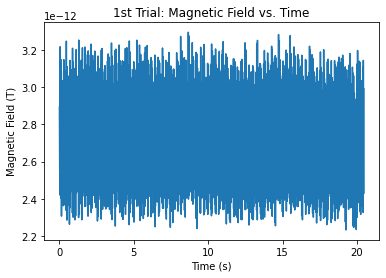

In [11]:
plt.plot(time, bfield)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (T)')
plt.title('1st Trial: Magnetic Field vs. Time')
plt.show()

In [12]:
component = bfield

y = np.fft.fft(component)
y_length = len(y)
sample_rate = 100 # Number of Points Per Second
sample_spacing = 1/sample_rate

freq = np.fft.fftfreq(y_length, sample_spacing)

y

array([ 5.62802730e-09+0.00000000e+00j, -3.01183026e-12-7.16616885e-12j,
       -8.04311622e-12-5.88607127e-12j, ...,
       -3.80077202e-12+1.31400836e-11j, -8.04311622e-12+5.88607127e-12j,
       -3.01183026e-12+7.16616885e-12j])

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


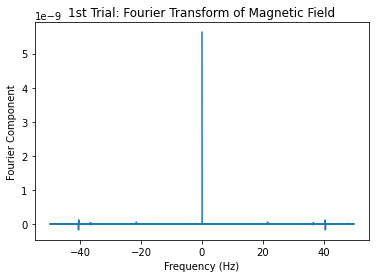

In [13]:
plt.plot(freq, y)
#plt.xlim(21, 22)
#plt.ylim(0,0.00000000005)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Component')
plt.title('1st Trial: Fourier Transform of Magnetic Field')
plt.show()

As you can see, there is the usual massive spike at 0 Hz indicating the non-periodic behavior. Then, there is also a spike at about 40 Hz and at about 20 Hz. We use the getFreq function to find these frequencies more precisely to be 40.48 Hz and 21.55 Hz. These are also reflected across the 0 frequency point, so we only care about the positive values. We now plot the data from the background, measured at the top of the fan, in order to rule out some of these peaks.

In [14]:
n = 5
indices = (-y).argsort()[:n]
print(indices)


def getFreq(frequency_list, index_list):
    """ This function takes two lists: one of the set that you
    want to find the values from, and one containing the
    indices at which you want the values from the first list.

    Parameters:

    frequency_list: list

        The list that the desired values are contained in

    index_list: list

        The list containing the indices for the desired values of
        the frequency list.


    Returns:

    freq_return: list

        A list containing the values from frequency_list at the
        indices contained in index_list
    """
    freq_return = []
    for i in index_list:
        freq_return.append(frequency_list[i])
    return freq_return


frequencies = getFreq(freq, indices)
print(frequencies)

[   0  836 1229 1620  445]
[0.0, 40.484261501210646, -40.484261501210646, -21.549636803874087, 21.549636803874087]


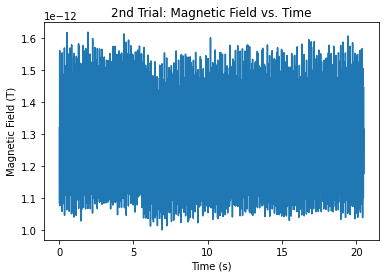

In [15]:
plt.plot(time2, bfield2)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (T)')
plt.title('2nd Trial: Magnetic Field vs. Time')
plt.show()

In [16]:
component2 = bfield2

y2 = np.fft.fft(component2)
y_length_2 = len(y2)
sample_rate_2 = 100 # Number of Points Per Second
sample_spacing_2 = 1/sample_rate_2

freq2 = np.fft.fftfreq(y_length_2, sample_spacing_2)

y2

array([ 2.66235149e-09+0.00000000e+00j,  9.55191255e-12-3.10280442e-13j,
        1.96963233e-13-1.00749040e-11j, ...,
       -6.65559556e-12-5.17056881e-12j,  1.96963233e-13+1.00749040e-11j,
        9.55191255e-12+3.10280442e-13j])

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


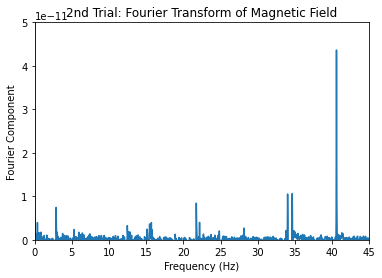

In [17]:
plt.plot(freq2, y2)
plt.xlim(0, 45)
plt.ylim(0,0.00000000005)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Component')
plt.title('2nd Trial: Fourier Transform of Magnetic Field')
plt.show()

We can see here that the 40 Hz peak is present in the background, so we can safely ignore it. Now, we can move on to the longer measurement in an effort to increase the resolution of the FFT.

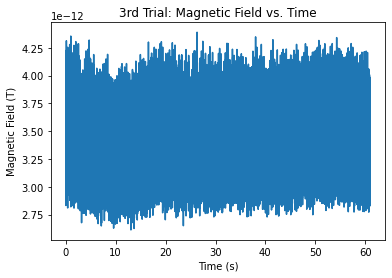

In [18]:
plt.plot(timeLong, bfieldLong)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (T)')
plt.title('3rd Trial: Magnetic Field vs. Time')
plt.show()

In [19]:
componentLong = bfieldLong

yLong = np.fft.fft(componentLong)
y_length_long = len(yLong)
sample_rate_long = 100 # Number of Points Per Second
sample_spacing_long = 1/sample_rate_long

freqLong = np.fft.fftfreq(y_length_long, sample_spacing_long)

yLong

array([2.11653385e-08-1.73271720e-25j, 2.96713599e-11+1.35435980e-10j,
       6.22421393e-11+1.16305555e-10j, ...,
       6.62396387e-11-2.68908853e-11j, 6.22421393e-11-1.16305555e-10j,
       2.96713599e-11-1.35435980e-10j])

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


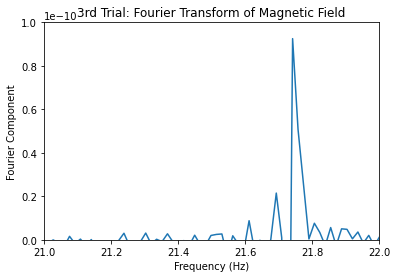

In [20]:
plt.plot(freqLong, yLong)
plt.xlim(21, 22)
plt.ylim(0,0.0000000001)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Component')
plt.title('3rd Trial: Fourier Transform of Magnetic Field')
plt.show()

Again, the peak at about 21.5 Hz is only one point, which is not very telling. This measurement was one minute long, as opposed to the first which was 20 seconds. We now try an even longer, twenty minute, measurement.

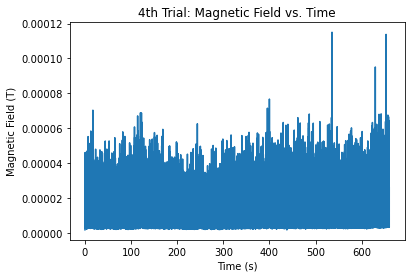

In [21]:
plt.plot(time20, bfield20)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field (T)')
plt.title('4th Trial: Magnetic Field vs. Time')
plt.show()

In [22]:
component20 = bfield20

y20 = np.fft.fft(component20)
y_length_20 = len(y20)
sample_rate_20 = 100 # Number of Points Per Second
sample_spacing_20 = 1/sample_rate_20

freq20 = np.fft.fftfreq(y_length_20, sample_spacing_20)

y20

array([ 9.10964243e-01+3.46944695e-18j,  2.66012905e-02+3.51498474e-02j,
       -7.22989442e-04-8.71113792e-03j, ...,
        3.65347742e-03-2.05376472e-02j, -7.22989442e-04+8.71113792e-03j,
        2.66012905e-02-3.51498474e-02j])

/opt/conda/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


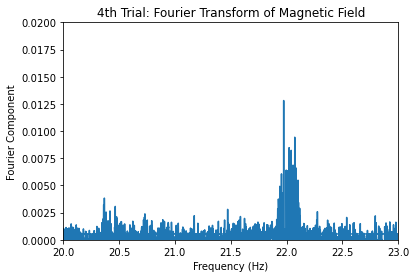

In [23]:
plt.plot(freq20, y20)
plt.xlim(20, 23)
plt.ylim(0,0.02)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Component')
plt.title('4th Trial: Fourier Transform of Magnetic Field')
plt.show()

Finally, we can see a wide peak at about this frequency. The peak has shifted to about 22 Hz, but seeing as the previous peak was only one point we don't need to be too concerned about this shift.

# Take Home Message

If we look at this last trial, we can see that the width of the frequency is about $0.1Hz$ in either direction. This brings us back to the original point about the electrical grid, generators, and blackouts. The modulation of current supplied to all American homes cannot vary by much in either direction. We likely don't see a peak exactly at the line frequency, $60Hz$, because the frequency of the current supplied to each device is not always the current that the motor will operate with. What matters is the very limited range (small width) of the frequency supplied to everything on the grid.

Don't take our word for it. Try it yourself! Use the [PhyPhox](https://phyphox.org/) phone app to take data of some device in your house that likely generates a magnetic field and see what frequency range you get. This example was done with a standard college box fan, but maybe there would be some shift in the frequency peak in different appliances, or even within different brands of the same appliance.